# LMAPR2001 - Block 2 : Second section

## Reflectivity and transmittivity of a slab

For a single slab of FeS2, in air (air => FeS2 => air)

In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
#range de fréquences angulaires [rad/s]
omegaG = 1.338e15
omega = np.logspace(12,np.log10(omegaG),200)

#film thickness [µm]
d = 0.05

#ambient air
nAir = 1
kappaAir = 0
N0 = 1 + 1j*0

#angle d'incidence [°]
phi0 = 0

def resulting(x) : 
    """
    @pre : x is an array of complex or real float values
    @post : returns the number resulting to the components of the array
    """
    return np.sqrt(sum(x**2))

#following values are obtained from the Excel file provided on moodle
epsilonInfinity1 = 19.17402283496171
epsilonInfinity2 = 22.09805938253293
epsilonInfinity3 = 20.60710234103419
epsilonInfinity = resulting(np.array([epsilonInfinity1,epsilonInfinity2,epsilonInfinity3]))
f11 = 4.213279900760202 
f12 = 1.961693284797713
f13 = 0.007966945581503451
f1 = resulting(np.array([f11,f12,f13]))
omegaTO11 = 79231717132503.97
omegaTO12 = 57563096713280.8
omegaTO13 = 49033016471727.84
omegaTO1 = resulting(np.array([omegaTO11,omegaTO12,omegaTO13]))
gamma11 = 151929351721.5274
gamma12 = 151947673655.9077
gamma13 = 156461516099.8209
gamma1 = resulting(np.array([gamma11,gamma12,gamma13]))
f22 = 2.318085089104123
f23 = 1.935048918661783
f2 = resulting(np.array([f22,f23]))
omegaTO22 = 70373122741473.44
omegaTO23 = 62330594312793.54
omegaTO2 = resulting(np.array([omegaTO22,omegaTO23]))
gamma22 = 151959123549.7535
gamma23 = 151954274514.8117
gamma2 = resulting(np.array([gamma22,gamma23]))
f32 = 3.803690401550578
f33 = 6.832435225656633
f3 = resulting(np.array([f32,f33]))
omegaTO32 = 73806724238431.17
omegaTO33 = 77733154461442.81
omegaTO3 = resulting(np.array([omegaTO32,omegaTO33]))
gamma32 = 151930325428.5151
gamma33 = 151936692746.3015
gamma3 = resulting(np.array([gamma32,gamma33]))
f = np.array([f1,f2,f3])
omegaTO = np.array([omegaTO1,omegaTO2,omegaTO3])
gamma = np.array([gamma1,gamma2,gamma3])

In [71]:
def epsilonIso(omega) : 
    somme = np.zeros(len(omega),dtype='cdouble')
    for i in range(3) : 
        somme += f[i]*omegaTO[i]**2/(omegaTO[i]**2-omega**2-(omega*gamma[i])*1j)
    return epsilonInfinity + somme

In [72]:
def realN(omega) : 
    epsilon = epsilonIso(omega)
    epsilonIsoReal = np.array([x.real for x in epsilon])
    epsilonIsoImg = np.array([x.imag for x in epsilon])
    return 1/(2**(1/2))*(epsilonIsoReal + (epsilonIsoReal**2+epsilonIsoImg**2)**(1/2))**(1/2)

In [73]:
def kappa(omega) : 
    epsilon = epsilonIso(omega)
    epsilonIsoReal = np.array([x.real for x in epsilon])
    epsilonIsoImg = np.array([x.imag for x in epsilon])
    return 1/(2**(1/2))*(-epsilonIsoReal + (epsilonIsoReal**2+epsilonIsoImg**2)**(1/2))**(1/2)

In [74]:
def complexNmod(omega) : 
    n = realN(omega)
    kappa = kappa(omega)
    return (n**2 + kappa**2)**1/2

In [75]:
def complexN(omega) : 
    n = realN(omega)
    kappaVal = kappa(omega)
    res = np.zeros(len(omega),dtype='cdouble')
    for i in range(len(res)) : 
        res[i] = n[i]-1j*kappaVal[i]
    return res

## Additional values

### Sine and cosine of incident angle

$\sin(\varphi_0) = \sin\left(\dfrac{\varphi_0\cdot\pi}{180}\right)$

$\cos(\phi_0) = \sqrt{1-\sin(\varphi_0)^2}$

In [76]:
N1 = complexN(omega)

#sin et cos de l'angle d'incidence (air=>FeS2)
sinphi0 = np.sin(phi0/180*np.pi)
cosphi0 = np.sqrt(1-sinphi0**2)

### Computation of the angle in the FeS2 slab (complex Snell's law)
$N_0\sin(\varphi_0) = N_1\sin(\varphi_1)$

$\sin(\varphi_1) = \dfrac{N_0\sin(\varphi_0)}{N_1}$

In [77]:
sinphi1 = N0*sinphi0/N1
cosphi1 = np.sqrt(1-sinphi1**2)

### Computation of the angle in the air (after transmission into the FeS2 slab)

$N_1\sin(\varphi_1) = N_2\sin(\varphi_2)$

$\sin(\varphi_2) = \dfrac{N_1\sin(\varphi_1)}{N_2}$

In [78]:
sinphi2 = N1*sinphi1/N0
cosphi2 = np.sqrt(1-sinphi2**2)

### Fresnel reflection and transmission coefficients at the 0-1 interface 

$r_{01p} = \dfrac{N_1\cos(\varphi_0)-N_0\cos(\varphi_1)}{N_1\cos(\varphi_0)+N_0\cos(\varphi_1)}$

$r_{01s} = \dfrac{N_0\cos(\varphi_0)-N_1\cos(\varphi_1)}{N_0\cos(\varphi_0)+N_1\cos(\varphi_1)}$

$t_{01p} = \dfrac{2N_0\cos(\varphi_0)}{N_1\cos(\varphi_0)+N_0\cos(\varphi_1)}$

$t_{01s} = \dfrac{2N_0\cos(\varphi_0)}{N_0\cos(\varphi_0)+N_1\cos(\varphi_1)}$

In [79]:
r01p = (N1*cosphi0-N0*cosphi1)/(N1*cosphi0+N0*cosphi1)
r01s = (N0*cosphi0-N1*cosphi1)/(N0*cosphi0+N1*cosphi1)
t01p = (2*N0*cosphi0)/(N1*cosphi0+N0*cosphi1)
t01s = (2*N0*cosphi0)/(N0*cosphi0+N1*cosphi1)

### Fresnel reflection and transmission coefficients at the 1-2 interface 

$r_{12p} = \dfrac{N_2\cos(\varphi_1)-N_1\cos(\varphi_2)}{N_2\cos(\varphi_1)+N_1\cos(\varphi_2)}$

$r_{12s} = \dfrac{N_1\cos(\varphi_1)-N_2\cos(\varphi_2)}{N_1\cos(\varphi_1)+N_2\cos(\varphi_2)}$

$t_{12p} = \dfrac{2N_1\cos(\varphi_1)}{N_2\cos(\varphi_1)+N_1\cos(\varphi_2)}$

$t_{12s} = \dfrac{2N_1\cos(\varphi_1)}{N_1\cos(\varphi_1)+N_2\cos(\varphi_2)}$

In [80]:
r12p = (N0*cosphi1-N1*cosphi2)/(N0*cosphi1+N1*cosphi2)
r12s = (N1*cosphi1-N0*cosphi2)/(N1*cosphi1+N0*cosphi2)
t12p = (2*N1*cosphi1)/(N0*cosphi1+N1*cosphi2)
t12s = (2*N1*cosphi1)/(N1*cosphi1+N0*cosphi2)

### Phase angle (film phase thickness)

$\beta = 2\pi\left(\dfrac{d_1}{\lambda}N_1\cos(\varphi_1)\right)$

where the wavelength in the vacuum $\text{[}10^{-6}\text{m]}$ is obtained as follows : $\lambda = \dfrac{2\pi c}{\omega}$, with $c$ the speed of light in vacuum.

<span style="color:red">Doppler correction for $\omega$ ??</span>

In [81]:
wavelength = 2*np.pi*3e14/omega
beta = 2*np.pi*d*N1*cosphi1/wavelength

### Polarized complex-amplitude reflection and transmission coefficients

$R_p = \dfrac{r_{01p}+r_{12p}\exp(-j2\beta)}{1+r_{01p}r_{12p}\exp(-j2\beta)}$

$R_s = \dfrac{r_{01s}+r_{12s}\exp(-j2\beta)}{1+r_{01s}r_{12s}\exp(-j2\beta)}$

$T_p = \dfrac{t_{01p}t_{12p}\exp(-j\beta)}{1+r_{01p}r_{12p}\exp(-j2\beta)}$

$T_s = \dfrac{t_{01s}t_{12s}\exp(-j\beta)}{1+r_{01s}r_{12s}\exp(-j2\beta)}$

In [82]:
Rp = (r01p+r12p*np.exp(1j*(-2*beta)))/(1+r01p*r12p*np.exp(1j*(-2*beta)))
Rs = (r01s+r12s*np.exp(1j*(-2*beta)))/(1+r01s*r12s*np.exp(1j*(-2*beta)))
Tp = (t01p*t12p*np.exp(1j*(-1*beta)))/(1+r01p*r12p*np.exp(1j*(-2*beta)))
Ts = (t01s*t12s*np.exp(1j*(-1*beta)))/(1+r01s*r12s*np.exp(1j*(-2*beta)))

### Results

Reflection : $R = \dfrac{1}{2}\left(R_p^2+R_s^2\right)$

Transmission : $T = \dfrac{1}{2}\left(T_p^2+T_s^2\right)$

Absorption : $A = 1-R-T$

In [83]:
R = 0.5*(abs(Rp)**2+abs(Rs)**2)
T = 0.5*(abs(Tp)**2+abs(Ts)**2)
A = 1-R-T

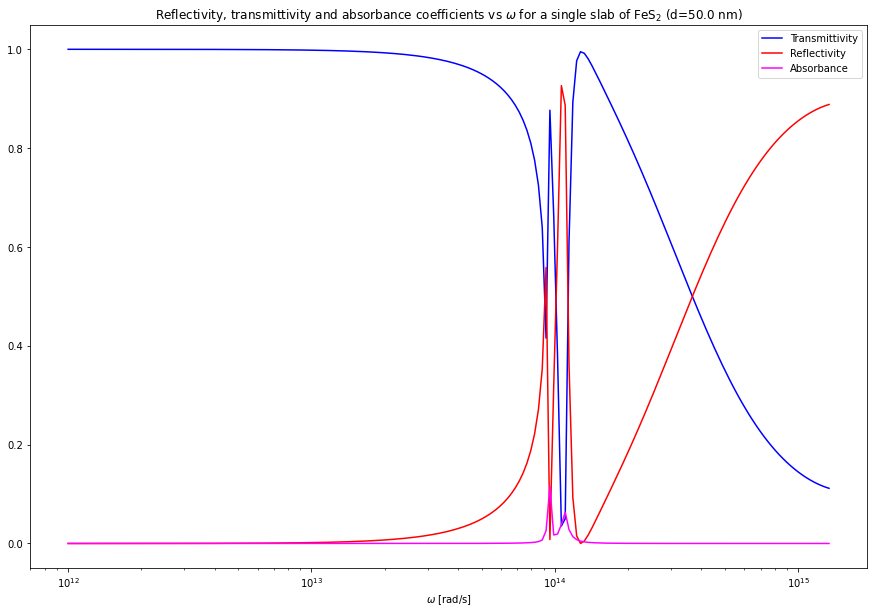

In [84]:
plt.figure(figsize=(15,10))
plt.plot(omega,T,color='blue',label="Transmittivity")
plt.plot(omega,R,color='red',label="Reflectivity")
plt.plot(omega,A,color='magenta',label = "Absorbance")
plt.title(r'Reflectivity, transmittivity and absorbance coefficients vs $\omega$ for a single slab of FeS$_2$ (d={} nm)'.format(d*1000))
plt.xlabel(r'$\omega$ [rad/s]')
plt.xscale('log')
plt.legend()
plt.show()

## Reflectivity of bulk material

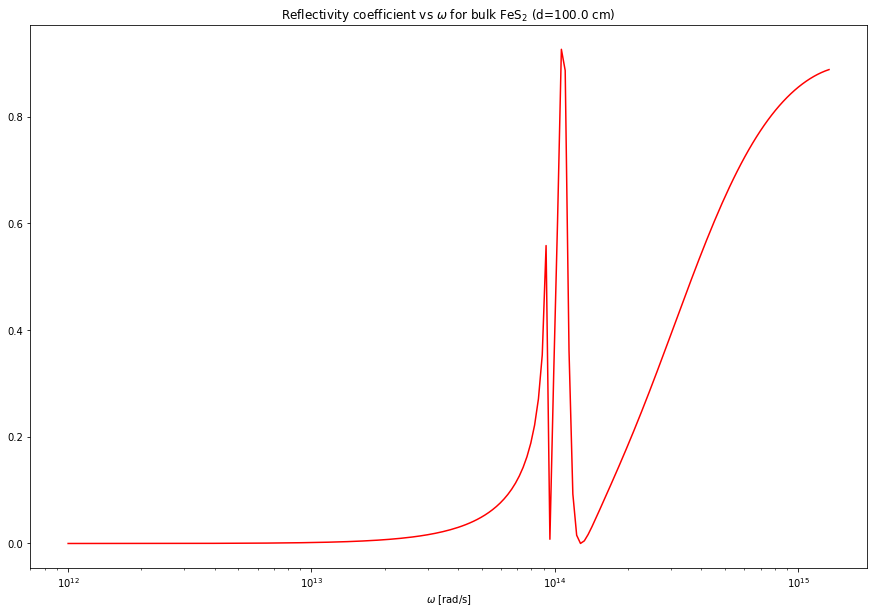

Highest peak : 0.9264054740490495 at 106340251123869.5 [rad/s]


In [87]:
#film thickness [µm]
d = 1e6
#ambient air
nAir = 1
kappaAir = 0
N0 = 1 + 1j*0
#angle d'incidence [°]
phi0 = 0
N1 = complexN(omega)
#sin et cos de l'angle d'incidence (air=>FeS2)
sinphi0 = np.sin(phi0/180*np.pi)
cosphi0 = np.sqrt(1-sinphi0**2)
sinphi1 = N0*sinphi0/N1
cosphi1 = np.sqrt(1-sinphi1**2)
sinphi2 = N1*sinphi1/N0
cosphi2 = np.sqrt(1-sinphi2**2)
r01p = (N1*cosphi0-N0*cosphi1)/(N1*cosphi0+N0*cosphi1)
r01s = (N0*cosphi0-N1*cosphi1)/(N0*cosphi0+N1*cosphi1)
r12p = (N0*cosphi1-N1*cosphi2)/(N0*cosphi1+N1*cosphi2)
r12s = (N1*cosphi1-N0*cosphi2)/(N1*cosphi1+N0*cosphi2)
Rp = (r01p+r12p*np.exp(1j*(-2*beta)))/(1+r01p*r12p*np.exp(1j*(-2*beta)))
Rs = (r01s+r12s*np.exp(1j*(-2*beta)))/(1+r01s*r12s*np.exp(1j*(-2*beta)))
R = 0.5*(abs(Rp)**2+abs(Rs)**2)
plt.figure(figsize=(15,10))
plt.plot(omega,R,color='red')
plt.title(r'Reflectivity coefficient vs $\omega$ for bulk FeS$_2$ (d={} cm)'.format(d/1e4))
plt.xlabel(r'$\omega$ [rad/s]')
plt.xscale('log')
plt.show()
print("Highest peak : {0} at {1} [rad/s]".format(max(R),omega[np.argmax(R)]))

We can see sharp peaks around $10^{14}$ [rad/s] (more precisely, the highest peak is situated on $1,063\times 10^{14}$ [rad/s]. As the frequency gets closer to the band gap frequency, we can also see an increase of the reflectivity coefficient <span style="color:red">**!!! JUSTIFIER POURQUOI !!!**</span>